In [131]:
def embobinados(m1, m2, m3, m4):
    x = m1 - m2
    y = m3 - m4
    return [x, y]

def angulo(v):
    from numpy import arctan2, degrees
    x,y = v
    ϕ = arctan2(y,x)
    return degrees(ϕ)

In [132]:
secuencia = [[1,0,0,0],[1,0,1,0],[1,1,1,0],[0,1,1,0],
             [0,1,1,1],[0,1,0,1],[0,0,0,1],[1,0,0,1]]

In [133]:
def subsistema_electrico(t, x, ms):
    q, q̇ = x
    a, b = 50,2
    
    #m1, m2, m3, m4 = ms
    m1, m2, m3, m4 = señal_control(t, x)
    v = embobinados(m1, m2, m3, m4)
    u_pre = angulo(v)
    u = u_pre + int(q/180)*180
    q̈ = b*u - a*q̇
    ẋ = [q̇, q̈]
    return ẋ
    
def subsistema_mecanico(t, x):
    q, q̇ = x
    
def señal_control(t, x):
    δ = 0.1
    n = t/δ
    
    señal_actual = secuencia[int(n%8)]
    return señal_actual
    
def motor_a_pasos(t, x, ms):
    q, q̇ = x
    
    ẋ = subsistema_electrico(t, x, ms)
    return ẋ

In [134]:
from scipy.integrate import ode

In [135]:
from matplotlib.pyplot import figure, style
style.use("dark_background")

In [136]:
x0 = [0, 0]
t0, tf = 0, 1
δt = 0.001
u0 = [0,1,0,0]

sis1 = ode(motor_a_pasos)
sis1.set_initial_value(x0, t0).set_f_params(u0);

In [137]:
ts, ys = [], []

while sis1.successful() and sis1.t <= tf:
    ts.append(sis1.t + δt)
    ys.append(sis1.integrate(sis1.t + δt))

(0, 1)

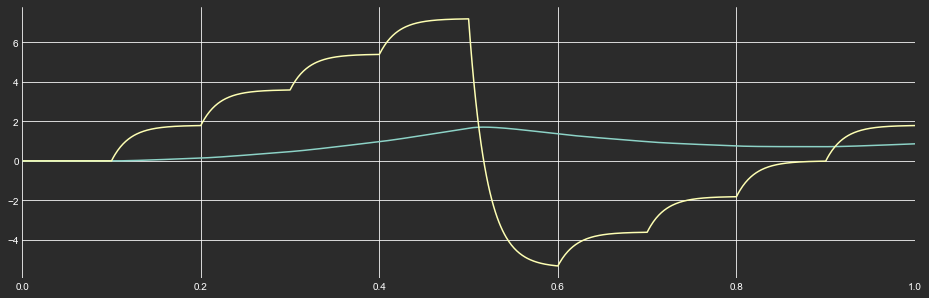

In [141]:
fig = figure(figsize=(16,5), facecolor=(43/256, 43/256, 43/256))
ax = fig.gca()
ax.plot(ts, ys)
ax.grid(True)
ax.set_facecolor((43/256, 43/256, 43/256))
ax.set_xlim(0,1)
#ax.set_ylim(1.6,2)
#ax.plot(tr, sr);